In [1]:
import numpy as np
import time

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.
using GPU: 1


In [2]:
model = Sequential()
model.add(Dense(20, input_dim=1, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

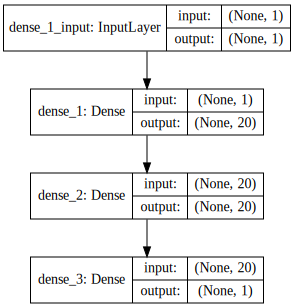

In [3]:
# model の表示
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [4]:
sdg = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0)
# sdg_momentum = keras.optimizers.SGD(lr=0.0001, momentum=0.9, decay=0)  # momentamありの場合．
# rmsprop = keras.optimizers.RMSprop()
# adam = keras.optimizers.Adam()

model.compile(optimizer=sdg, loss='mean_squared_error')

In [5]:
def f(x):
    return np.cos(0.25 * x)

X_train=np.arange(-10,10,0.01,dtype=np.float32)
Y_train= f(X_train)
# X_train, Y_trainは１次元配列なので，reshapeで ２次元の(n,dim)に変換します．dim=1です．
X_train=np.reshape(X_train,[-1,1])   # (2000,)  -> (2000,1)
Y_train=np.reshape(Y_train,[-1,1]) 
num_train=np.size(X_train)

# テスト用の x も準備します．
X_val=np.arange(-8,8,0.1,dtype=np.float32)
Y_val= f(X_val)
X_val=np.reshape(X_val,[-1,1])
Y_val=np.reshape(Y_val,[-1,1])
num_val=np.size(X_val)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import keras

# callback のクラス ShowGraphを定義
# グラフ表示で必要なので，コンストラクタで，model, 最大エポック数 を受け取っておく．
# model は，学習途中のパラメータを用いて， y=f(x)を描画するのに必要．
class ShowGraph(keras.callbacks.Callback):
    def __init__(self,model,max_epoch):
        # 表示エリアの設定
        self.fig=plt.figure()
        self.fig1 = self.fig.add_subplot(121)
        self.fig1.axis([0, max_epoch, 0, 50])
        self.fig2 = self.fig.add_subplot(122)
        self.fig2.axis([-8,8,-10,30])
        self.fig1.set_title('loss')
        self.fig1.set_ylabel('loss')
        self.fig1.set_xlabel('epoch')
        self.model=model
        self.max_epoch=max_epoch
        self.start=time.time()
    
    # 学習の最初に呼び出される
    def on_train_begin(self, logs={}):
        self.losses=[]
        self.losses_val=[]
        self.n_epoch=[]
    
    # 各epochの最後に呼び出される
    def on_epoch_end(self, epoch, logs={}):
        self.n_epoch.append(epoch)
        self.losses.append(logs.get('loss'))
        self.losses_val.append(logs.get('val_loss'))     
        self.loss_val=logs.get('val_loss')
    
        display.clear_output(wait = True)
        self.fig1.plot(self.n_epoch,self.losses,"b")
        self.fig1.plot(self.n_epoch,self.losses_val,"r")
        Y_pred=self.model.predict_on_batch(X_val)
        x0=np.reshape(X_val,[-1])
        y0=np.reshape(Y_pred,[-1])
        self.fig2.plot(x0,y0,"b")
        self.fig2.plot(x0,f(x0),"r")
        self.fig2.set_title('y=0.5(x-2)^2-5')
        self.fig2.set_ylabel('f(x)')
        self.fig2.set_xlabel('x')
        display.display(self.fig)
        if epoch<self.max_epoch-1:
            self.fig2.cla()
    
    # デストラクタ(オブジェクトが消滅時に実行される)  
    # グラフが２つ表示されるのを防止．さらに最終val loss値の表示．
    def __del__(self):
        display.clear_output(wait = True)
        print("loss_val:",self.loss_val) 
        print('Time: ',time.time()-self.start)

('loss_val:', 0.080219900177326053)
('Time: ', 31.89062809944153)


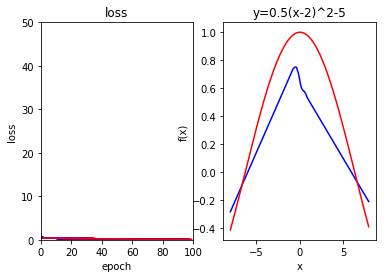

In [7]:
num_epoch=100
show_graph=ShowGraph(model,num_epoch)
model.fit(X_train, Y_train, batch_size=20, epochs=num_epoch, validation_data=(X_val,Y_val), verbose=0, callbacks=[show_graph])
del show_graph